In [ ]:
#important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os



In [ ]:
data=pd.read_csv(r"/content/E-com_Data.csv",dtype={9:'str',10:'str'})

In [ ]:
data.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,10/29/2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,10/5/2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,10/12/2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,8/22/2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10/10/2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [ ]:
#Let's see columns in data set
data.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [ ]:
#Let's See Shape of the Data Frame
data.shape

(541116, 12)

In [ ]:
#Data Set info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [ ]:
#decsribe the data set
data.describe()

,CustomerID,InvoieNo,Quantity,price per Unit,Price,Sold as set
count,404189.000000,537979.000000,537979.000000,537979.000000,537979.000000,0.0
mean,2181.909035,385017.572063,9.343339,378.339062,2161.414593,NaN
std,1252.681881,13426.052649,27.623322,440.048823,4538.487177,NaN
min,2.000000,361429.000000,-2003.000000,1.000000,-10152.000000,NaN
25%,1207.000000,372961.000000,1.000000,169.000000,451.000000,NaN
50%,2078.000000,385706.000000,3.000000,261.000000,1194.000000,NaN
75%,3291.000000,396873.000000,10.000000,456.000000,2232.000000,NaN
max,4372.000000,406651.000000,3186.000000,64973.000000,90400.000000,NaN


Data Preprocessing

Data Cleaning

In [ ]:
#droping duplicates from data

data.drop_duplicates(inplace=True)
data.shape

(537971, 12)

In [ ]:
#find the null values in the data set
data.isnull().sum()

,0
CustomerID,133790
Item Code,1
InvoieNo,1
Date of purchase,1
Quantity,1
Time,1
price per Unit,1
Price,1
Shipping Location,1
Cancelled_status,529626


In [ ]:
#checking total missing values

data.isnull().sum().sum()

1739363

In [ ]:
#checking null values in percentage
(data.isnull().sum()/data.shape[0])*100

,0
CustomerID,24.869370
Item Code,0.000186
InvoieNo,0.000186
Date of purchase,0.000186
Quantity,0.000186
Time,0.000186
price per Unit,0.000186
Price,0.000186
Shipping Location,0.000186
Cancelled_status,98.448801


In [ ]:
#we drop coloumns Cancelled_status, Reason of return, Sold as set As these coloumns have almost all values are null
# droping item code as they are not going to effect our modeling
data.drop(["Reason of return","Sold as set"],axis=1,inplace=True)

In [ ]:
#checking total number of missing rows

data.isnull().all(axis=1).sum()

1

In [ ]:
#dropping the empty rows from the data set

data.dropna(how="all",inplace=True)

In [ ]:
data.isnull().sum()

,0
CustomerID,133789
Item Code,0
InvoieNo,0
Date of purchase,0
Quantity,0
Time,0
price per Unit,0
Price,0
Shipping Location,0
Cancelled_status,529625


In [ ]:
#getting the location wise mode of CustomerID

location_wise_custid=data.groupby("Shipping Location")["CustomerID"].agg(lambda x:x.mode()[0] if len(x.mode())>0 else x.mode)
print(location_wise_custid)

Shipping Location
Location 1     1896.0
Location 10    1896.0
Location 11    1896.0
Location 14    4043.0
Location 15    4043.0
Location 20     331.0
Location 21     335.0
Location 23    2179.0
Location 24    1364.0
Location 25    4043.0
Location 26    4043.0
Location 28     699.0
Location 31    1301.0
Location 32    1896.0
Location 34      11.0
Location 36    4043.0
Location 37    4043.0
Location 4     4043.0
Location 7     1054.0
Location 8     4024.0
Name: CustomerID, dtype: float64


In [ ]:
#creating function to fillna of CustomerID using mode of CustomerID according to Shipping Location
def fill_cust_id(row):
    if pd.isna(row["CustomerID"]):
        return location_wise_custid.get(row["Shipping Location"])
    return row["CustomerID"]

In [ ]:
#applying fill_customer_id on CustomerID column

data["CustomerID"]=data.apply(fill_cust_id,axis=1)

In [ ]:
#rechecking the null values

data.isnull().sum()

,0
CustomerID,0
Item Code,0
InvoieNo,0
Date of purchase,0
Quantity,0
Time,0
price per Unit,0
Price,0
Shipping Location,0
Cancelled_status,529625


In [ ]:
#checking info of cleaned data

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 537970 entries, 0 to 537978
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         537970 non-null  float64
 1   Item Code          537970 non-null  object 
 2   InvoieNo           537970 non-null  float64
 3   Date of purchase   537970 non-null  object 
 4   Quantity           537970 non-null  float64
 5   Time               537970 non-null  object 
 6   price per Unit     537970 non-null  float64
 7   Price              537970 non-null  float64
 8   Shipping Location  537970 non-null  object 
 9   Cancelled_status   8345 non-null    object 
dtypes: float64(5), object(5)
memory usage: 45.1+ MB


In [ ]:
df=data.copy()

Handling the categorical data

In [ ]:
#handing categorical data using Frequency encoding

frequency_encoding=data["Shipping Location"].value_counts() / len(data)
data["Shipping Location"]=data["Shipping Location"].map(frequency_encoding)

In [ ]:
data.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status
0,4355.0,15734,398177.0,10/29/2017,6.0,3:36:00 PM,321.0,1926.0,0.00677,NaN
1,4352.0,14616,394422.0,10/5/2017,2.0,2:53:00 PM,870.0,1740.0,0.00677,NaN
2,4352.0,14614,394422.0,10/12/2017,2.0,2:53:00 PM,933.0,1866.0,0.00677,NaN
3,4352.0,85014B,388633.0,8/22/2017,3.0,2:47:00 PM,623.0,1869.0,0.00677,NaN
4,4352.0,15364,394422.0,10/10/2017,2.0,2:53:00 PM,944.0,1888.0,0.00677,NaN


Handling Returns values If Any

In [ ]:
#converting Date of Purchase from object to datetime

data["Date of purchase"]=pd.to_datetime(data["Date of purchase"])

In [ ]:
#checking the consitenecy of price column
data["Price"]=data["Quantity"]*data["price per Unit"]

EDA

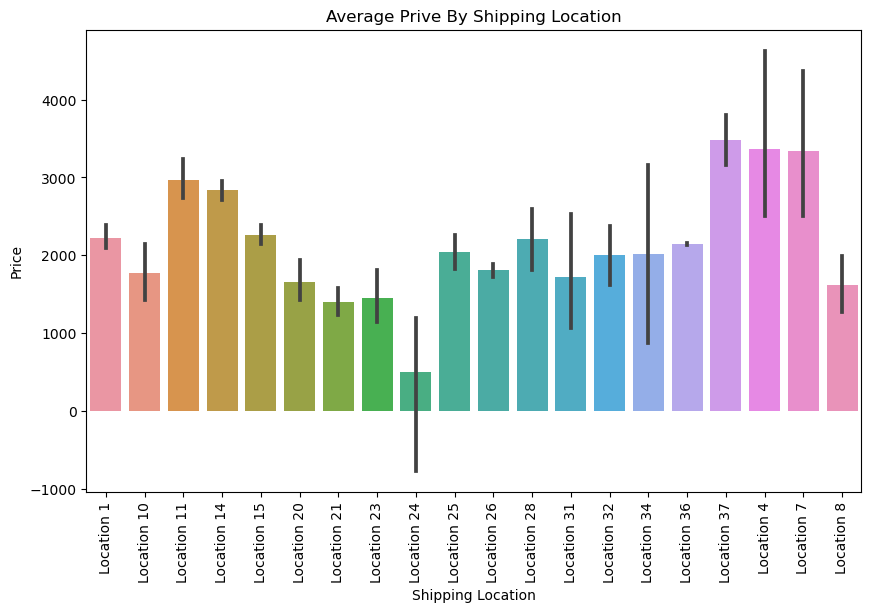

In [ ]:
#shipping location impact
fig=plt.figure(figsize=(10,6))
sns.barplot(x="Shipping Location", y="Price", data=df, estimator=np.mean)
plt.title("Average Prive By Shipping Location")
plt.xticks(rotation=90)
plt.show()

Unique Customers: 4349


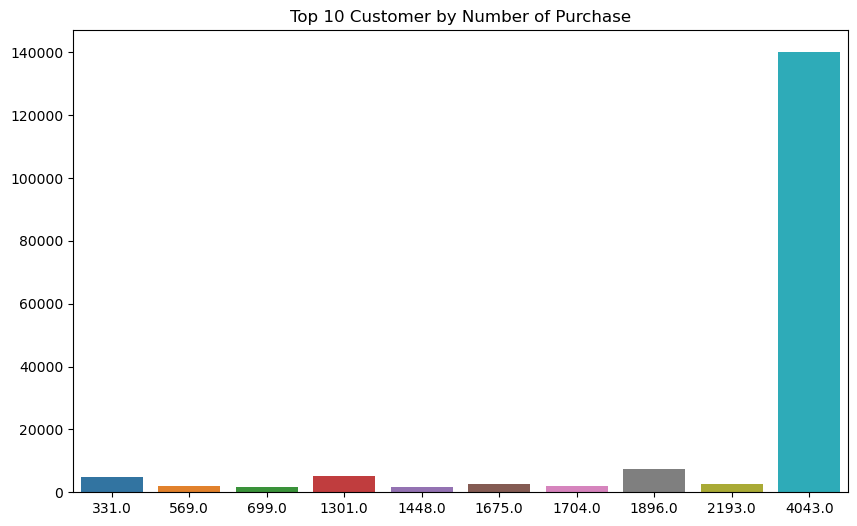

In [ ]:
#Top customer bu number of purchase
print(f"Unique Customers: {data['CustomerID'].nunique()}")

top_customers=data["CustomerID"].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_customers.index, y=top_customers.values)
plt.title("Top 10 Customer by Number of Purchase")
plt.show()

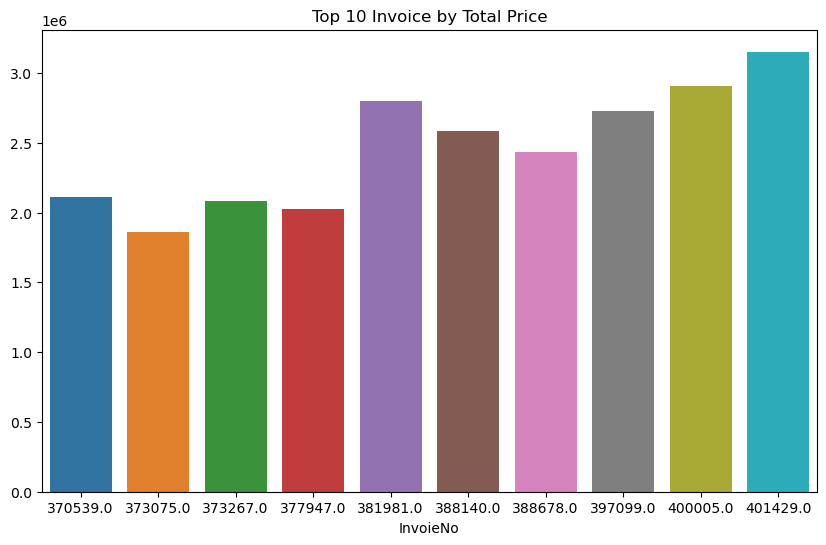

In [ ]:
#Top 10 Invoice by Total Price
invoice_total= data.groupby("InvoieNo")["Price"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=invoice_total.index, y=invoice_total.values)
plt.title("Top 10 Invoice by Total Price")
plt.show()

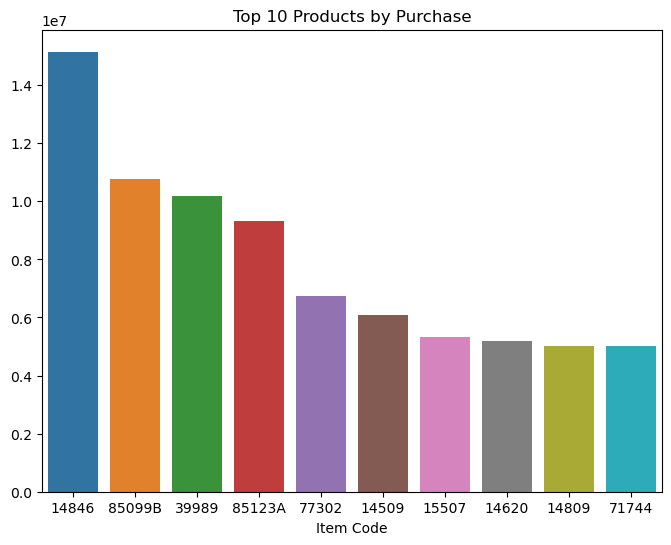

In [ ]:
#Top products by revenue

top_products=data.groupby("Item Code")["Price"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top 10 Products by Purchase')
plt.show()

Create Recency, Monetory & frequency (RFM) Columns

In [ ]:
#Create Monetory Coloumn

monetory_df=data.groupby("CustomerID")["Price"].sum().reset_index()
monetory_df.rename(columns={"Price":"Monetory"}, inplace=True)
data=data.merge(monetory_df, on="CustomerID", how="left")
print(monetory_df)
data.head()

      CustomerID  Monetory
0            2.0  553704.0
1            3.0  257404.0
2            4.0  176613.0
3            5.0   41976.0
4            6.0  151822.0
...          ...       ...
4344      4368.0   20480.0
4345      4369.0   10774.0
4346      4370.0   24962.0
4347      4371.0  280608.0
4348      4372.0  262820.0

[4349 rows x 2 columns]


,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Monetory
0,4355.0,15734,398177.0,2017-10-29,6.0,3:36:00 PM,321.0,1926.0,0.00677,NaN,39209.0
1,4352.0,14616,394422.0,2017-10-05,2.0,2:53:00 PM,870.0,1740.0,0.00677,NaN,277997.0
2,4352.0,14614,394422.0,2017-10-12,2.0,2:53:00 PM,933.0,1866.0,0.00677,NaN,277997.0
3,4352.0,85014B,388633.0,2017-08-22,3.0,2:47:00 PM,623.0,1869.0,0.00677,NaN,277997.0
4,4352.0,15364,394422.0,2017-10-10,2.0,2:53:00 PM,944.0,1888.0,0.00677,NaN,277997.0


In [ ]:
#create frequency coloum

frequency_df=data.groupby("CustomerID")["InvoieNo"].count().reset_index()
frequency_df.rename(columns={"InvoieNo":"Frequency"}, inplace=True)
data=data.merge(frequency_df, on="CustomerID", how="left")
print(frequency_df)
data.head()

      CustomerID  Frequency
0            2.0        182
1            3.0         27
2            4.0         72
3            5.0         16
4            6.0         84
...          ...        ...
4344      4368.0         10
4345      4369.0          7
4346      4370.0         13
4347      4371.0        754
4348      4372.0         70

[4349 rows x 2 columns]


,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Monetory,Frequency
0,4355.0,15734,398177.0,2017-10-29,6.0,3:36:00 PM,321.0,1926.0,0.00677,NaN,39209.0,21
1,4352.0,14616,394422.0,2017-10-05,2.0,2:53:00 PM,870.0,1740.0,0.00677,NaN,277997.0,122
2,4352.0,14614,394422.0,2017-10-12,2.0,2:53:00 PM,933.0,1866.0,0.00677,NaN,277997.0,122
3,4352.0,85014B,388633.0,2017-08-22,3.0,2:47:00 PM,623.0,1869.0,0.00677,NaN,277997.0,122
4,4352.0,15364,394422.0,2017-10-10,2.0,2:53:00 PM,944.0,1888.0,0.00677,NaN,277997.0,122


In [ ]:
#Creating Recency Column

latest_date=data["Date of purchase"].max()
recency_df=data.groupby("CustomerID")["Date of purchase"].agg(lambda x:(latest_date-x.max()).days).reset_index()
recency_df.rename(columns={"Date of purchase":"Recency"},inplace=True)
data=data.merge(recency_df,on="CustomerID",how="left")

In [ ]:
data.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Monetory,Frequency,Recency
0,4355.0,15734,398177.0,2017-10-29,6.0,3:36:00 PM,321.0,1926.0,0.00677,NaN,39209.0,21,43
1,4352.0,14616,394422.0,2017-10-05,2.0,2:53:00 PM,870.0,1740.0,0.00677,NaN,277997.0,122,39
2,4352.0,14614,394422.0,2017-10-12,2.0,2:53:00 PM,933.0,1866.0,0.00677,NaN,277997.0,122,39
3,4352.0,85014B,388633.0,2017-08-22,3.0,2:47:00 PM,623.0,1869.0,0.00677,NaN,277997.0,122,39
4,4352.0,15364,394422.0,2017-10-10,2.0,2:53:00 PM,944.0,1888.0,0.00677,NaN,277997.0,122,39


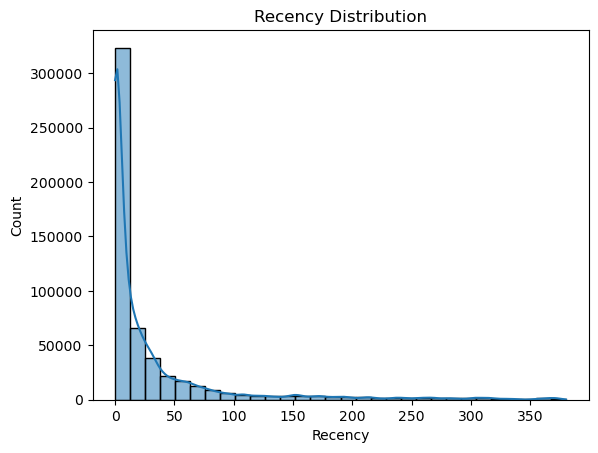

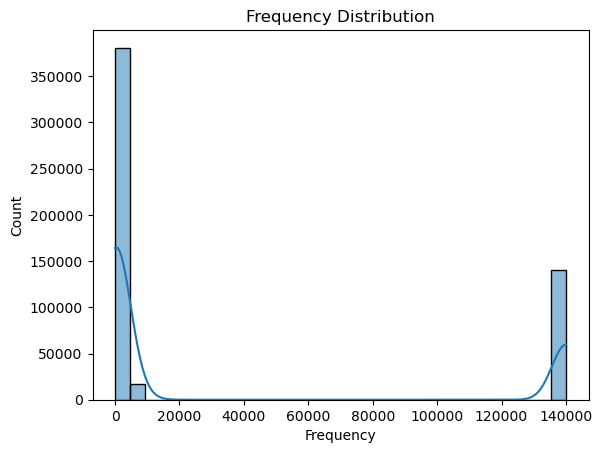

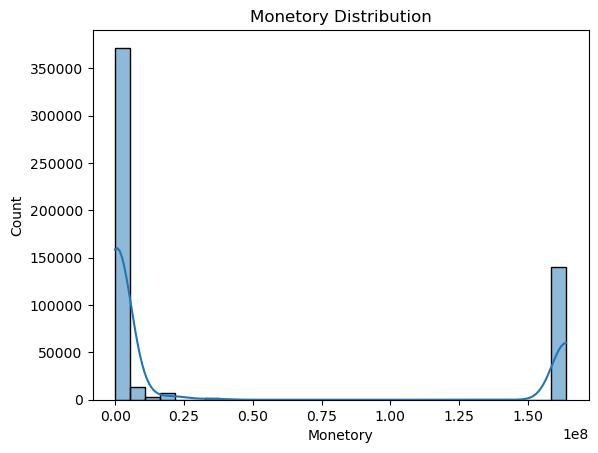

In [ ]:
#Rececny Distribution
sns.histplot(data["Recency"], bins=30, kde=True)
plt.title("Recency Distribution")
plt.show()

#Frequency Distribution
sns.histplot(data["Frequency"], bins=30, kde=True)
plt.title("Frequency Distribution")
plt.show()

#Monetory Distribution
sns.histplot(data["Monetory"], bins=30, kde=True)
plt.title("Monetory Distribution")
plt.show()


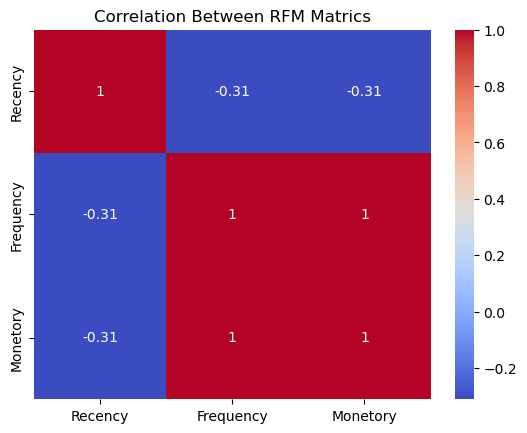

In [ ]:
#Correlation heatmap
corr_matrix=data[["Recency","Frequency","Monetory"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Between RFM Matrics")
plt.show()

In [ ]:
# RFM quantiles
data['R_Score'] = pd.qcut(data['Recency'], 6, labels=[5,4,3,2,1],duplicates='drop')
data['F_Score'] = pd.qcut(data['Frequency'], 6, labels=[1, 2, 3, 4, 5],duplicates='drop')
data['M_Score'] = pd.qcut(data['Monetory'], 6, labels=[1, 2, 3, 4, 5],duplicates='drop')

data[["R_Score","F_Score","M_Score"]]=data[["R_Score","F_Score","M_Score"]].astype(int)

# Combine scores
data['RFM_Score'] = data['R_Score']+data['F_Score']+data['M_Score']
data.sample(10)

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Monetory,Frequency,Recency,R_Score,F_Score,M_Score,RFM_Score
161107,2894.0,14979,394470.0,2017-10-11,24.0,9:09:00 AM,245.0,5880.0,0.933052,NaN,529764.0,123,66,1,2,3,6
134603,3238.0,14403,379387.0,2017-06-02,12.0,3:33:00 PM,113.0,1356.0,0.933052,NaN,1016457.0,665,38,2,4,4,10
252082,1809.0,13406,373519.0,2017-04-01,12.0,11:49:00 AM,126.0,1512.0,0.933052,NaN,111524.0,46,16,3,1,1,5
150234,3042.0,15570,376067.0,2017-05-06,1.0,9:44:00 AM,181.0,181.0,0.933052,NaN,280874.0,111,99,1,2,2,5
106162,3578.0,82574,362051.0,2016-12-10,1.0,2:54:00 PM,925.0,925.0,0.933052,NaN,89330.0,96,24,2,2,1,5
174444,2708.0,15716,387221.0,2017-08-10,8.0,11:44:00 AM,167.0,1336.0,0.933052,NaN,180078.0,94,35,2,2,2,6
449083,4043.0,13871,381172.0,2017-06-09,1.0,5:59:00 PM,376.0,376.0,0.933052,NaN,163820422.0,140017,0,5,5,5,15
136729,3223.0,74906,388496.0,2017-08-19,2.0,12:12:00 PM,779.0,1558.0,0.933052,NaN,895957.0,632,18,3,4,4,11
130261,3280.0,72800B,406232.0,2017-12-17,12.0,2:52:00 PM,116.0,1392.0,0.933052,NaN,1318131.0,344,2,4,4,4,12
390128,278.0,15729,381884.0,2017-06-24,12.0,10:22:00 AM,210.0,2520.0,0.933052,NaN,1396584.0,496,3,4,4,4,12


In [ ]:
#Converting RFM Score into Percentage

data["RFM_Score%"]=(data["RFM_Score"]/15)*100

In [ ]:
data.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Monetory,Frequency,Recency,R_Score,F_Score,M_Score,RFM_Score,RFM_Score%
0,4355.0,15734,398177.0,2017-10-29,6.0,3:36:00 PM,321.0,1926.0,0.00677,NaN,39209.0,21,43,2,1,1,4,26.666667
1,4352.0,14616,394422.0,2017-10-05,2.0,2:53:00 PM,870.0,1740.0,0.00677,NaN,277997.0,122,39,2,2,2,6,40.000000
2,4352.0,14614,394422.0,2017-10-12,2.0,2:53:00 PM,933.0,1866.0,0.00677,NaN,277997.0,122,39,2,2,2,6,40.000000
3,4352.0,85014B,388633.0,2017-08-22,3.0,2:47:00 PM,623.0,1869.0,0.00677,NaN,277997.0,122,39,2,2,2,6,40.000000
4,4352.0,15364,394422.0,2017-10-10,2.0,2:53:00 PM,944.0,1888.0,0.00677,NaN,277997.0,122,39,2,2,2,6,40.000000


### univariate Analysis of numerical columns

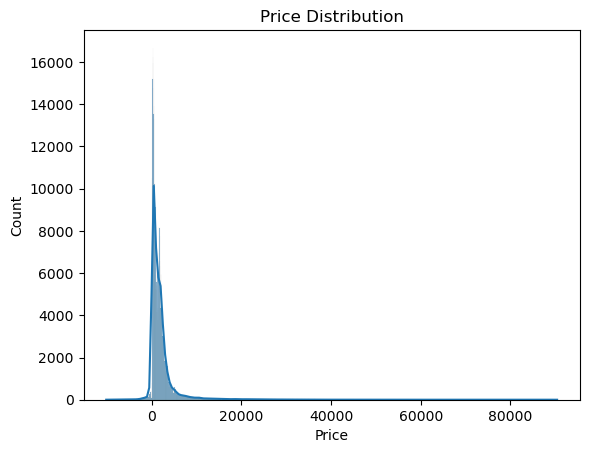

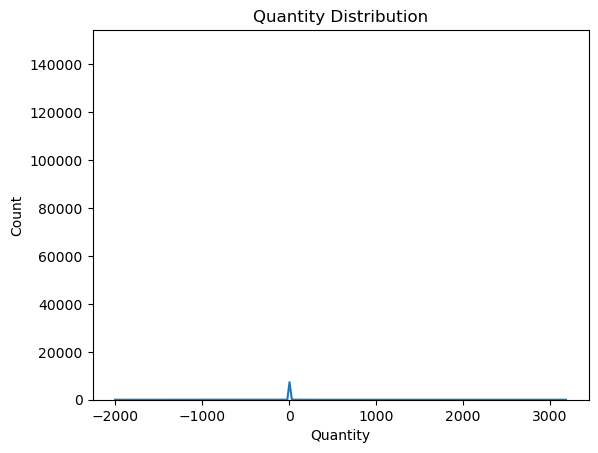

In [ ]:
#Price Distribution
sns.histplot(df["Price"], kde=True)
plt.title("Price Distribution")
plt.show()

#Quantity Distribution
sns.histplot(df["Quantity"], kde=True)
plt.title("Quantity Distribution")
plt.show()

### Corelation Analysis

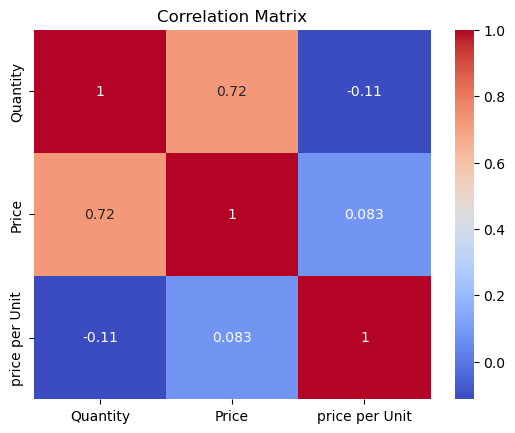

In [ ]:
#Correlation matrix
corr_matrix=data[["Quantity","Price","price per Unit"]].corr()

#Correlation heatmap
sns.heatmap(data=corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Time Base Analysis

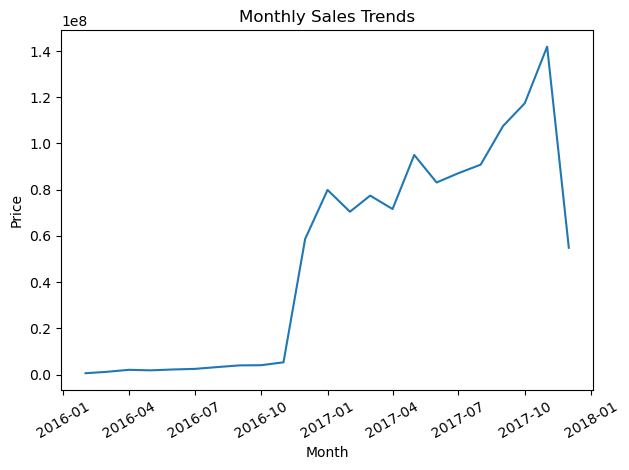

In [ ]:
#Group by month
data['Month'] = data['Date of purchase'].dt.to_period('M')
monthly_sales = data.groupby('Month')['Price'].sum().reset_index()

#Convert "Month" back to a datetime or string format for plotting
monthly_sales["Month"]=monthly_sales["Month"].dt.to_timestamp()

#Plot sales trend
sns.lineplot(x="Month", y="Price", data=monthly_sales)
plt.title("Monthly Sales Trends")
plt.xticks(rotation=30)
plt.tight_layout() #To make sure label fit properly
plt.show()

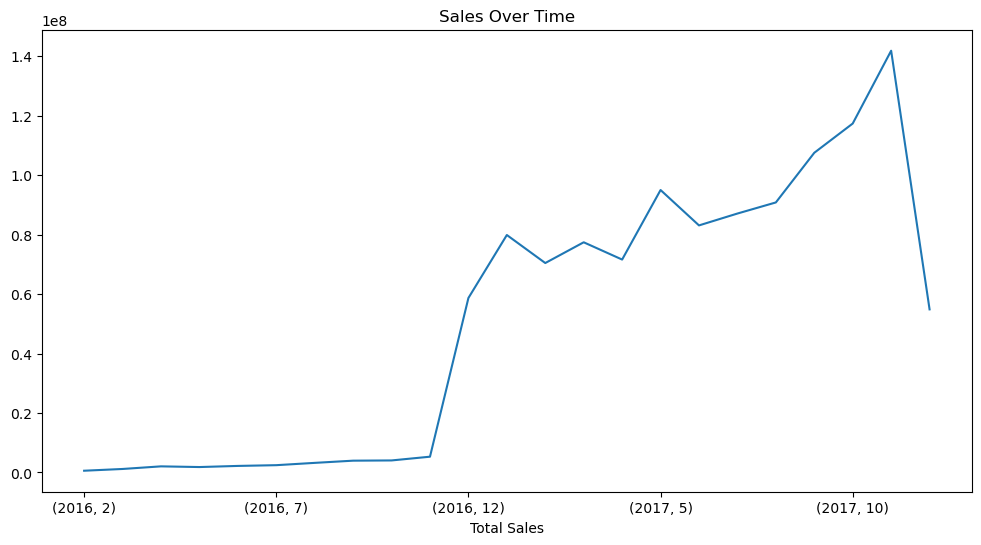

In [ ]:
#Sales over time

#Extract month and year from Date of purchase
data["Year"]= pd.to_datetime(data["Date of purchase"]).dt.year
data["Month"]= pd.to_datetime(data["Date of purchase"]).dt.month

#Group by Year and Month
sales_over_time=data.groupby(["Year","Month"])["Price"].sum()

#Plot sales over time
sales_over_time.plot(kind="line", figsize=(12,6))
plt.title("Sales Over Time")
plt.xlabel("Total Sales")
plt.show()

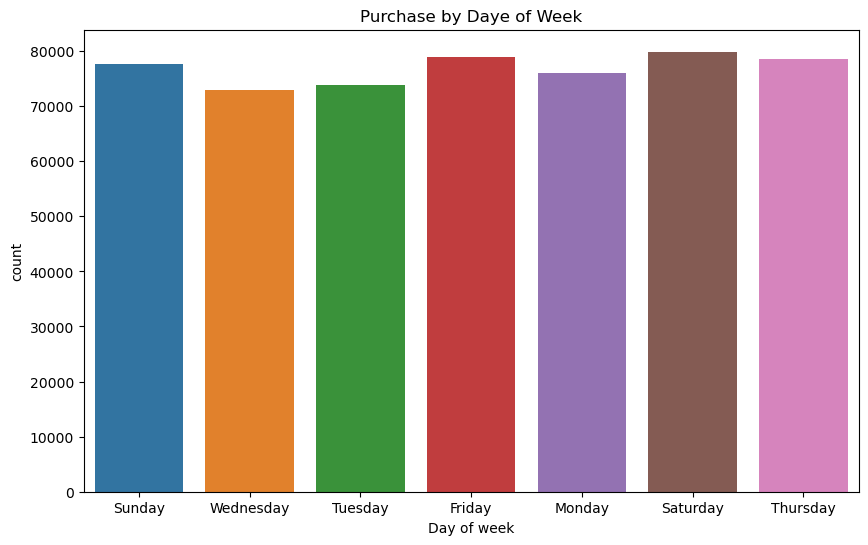

In [ ]:
#Purchase by week days

data["Date of purchase"]= pd.to_datetime(data["Date of purchase"])

data["Day of week"]= data["Date of purchase"].dt.day_name()
data["Month"]= data["Date of purchase"].dt.month

#Count plot for Days of Week
plt.figure(figsize=(10,6))
sns.countplot(x="Day of week", data=data)
plt.title("Purchase by Daye of Week")
plt.show()

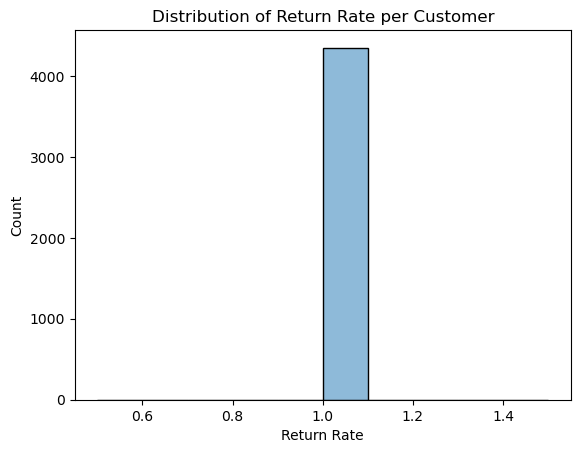

In [ ]:
#Calculate the raturn rate per customer

returns_count= data["CustomerID"].value_counts()

total_count= data["CustomerID"].value_counts()

return_rate_per_customer= returns_count / total_count

# Plot return rate distribution
sns.histplot(return_rate_per_customer, bins=10, kde=True)
plt.title('Distribution of Return Rate per Customer')
plt.xlabel('Return Rate')
plt.show()

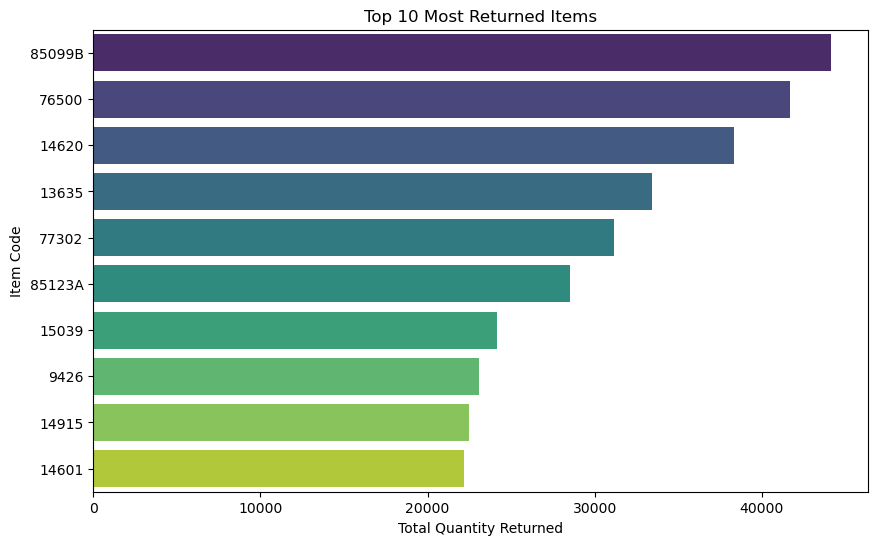

In [ ]:
returned_items = data[data['Cancelled_status'] == True]

# Step 2: Group by 'Item Code' and sum the 'Quantity' of returns
most_returned_items = data.groupby('Item Code')['Quantity'].sum()

# Step 3: Sort the results in descending order to get the most returned items
most_returned_items = most_returned_items.sort_values(ascending=False)

# Step 4: Plot the top N most returned items (let's take top 10)
top_n = most_returned_items.head(10)

# Plot using Seaborn barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_n.values, y=top_n.index, palette="viridis")
plt.title('Top 10 Most Returned Items')
plt.xlabel('Total Quantity Returned')
plt.ylabel('Item Code')
plt.show()

In [ ]:
data['FM/2']=data['Frequency']+data['Monetory']

In [ ]:
data.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Monetory,Frequency,Recency,R_Score,F_Score,M_Score,RFM_Score,RFM_Score%,FM/2
0,4355.0,15734,398177.0,2017-10-29,6.0,3:36:00 PM,321.0,1926.0,0.00677,NaN,39209.0,21,43,2,1,1,4,26.666667,39230.0
1,4352.0,14616,394422.0,2017-10-05,2.0,2:53:00 PM,870.0,1740.0,0.00677,NaN,277997.0,122,39,2,2,2,6,40.000000,278119.0
2,4352.0,14614,394422.0,2017-10-12,2.0,2:53:00 PM,933.0,1866.0,0.00677,NaN,277997.0,122,39,2,2,2,6,40.000000,278119.0
3,4352.0,85014B,388633.0,2017-08-22,3.0,2:47:00 PM,623.0,1869.0,0.00677,NaN,277997.0,122,39,2,2,2,6,40.000000,278119.0
4,4352.0,15364,394422.0,2017-10-10,2.0,2:53:00 PM,944.0,1888.0,0.00677,NaN,277997.0,122,39,2,2,2,6,40.000000,278119.0


KMeans Modeling

In [ ]:
#KMeans Model

from sklearn.cluster import KMeans

rfm=data[['Recency','FM/2']]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, confusion_matrix,classification_report

In [ ]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)
rfm_scaled

array([[ 0.21911043, -0.6118981 ],
       [ 0.15124699, -0.60855249],
       [ 0.15124699, -0.60855249],
       ...,
       [-0.44255808, -0.59862845],
       [-0.44255808, -0.59862845],
       [-0.44255808, -0.59862845]])

In [ ]:
inertia = []
db_scores = []
wcss = []
for i in range(2, 11):
        kmeans = KMeans(n_clusters=i, random_state=42, n_init=10, max_iter=300)
        kmeans.fit(rfm_scaled)
        wcss.append(kmeans.inertia_)

        db_score = davies_bouldin_score(rfm_scaled, kmeans.labels_)
        db_scores.append(db_score)

Text(0.5, 1.0, 'Elbow Method')

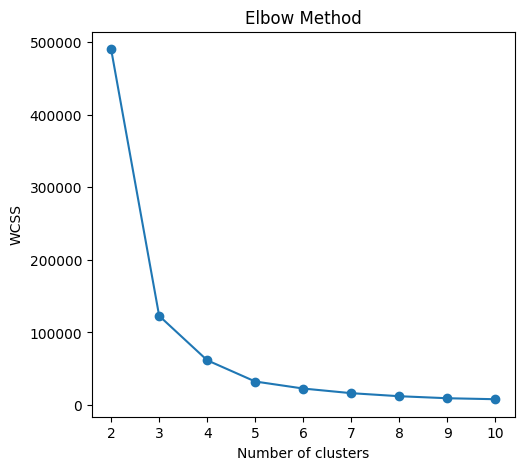

In [ ]:
# Plot Elbow method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title(f'Elbow Method')

here, we can see the WCSS value is not getting much affected after the cluster value 4 or 5. So, here we are taking the optimal clusters as 4.

In [ ]:
# Fit K-means with the optimal number of clusters (let's say 4 for this example)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters,n_init=10, max_iter=100, random_state=42)
clusters = kmeans.fit_predict(rfm_scaled)
data['Cluster'] = clusters

In [ ]:
data.sample(5)

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,...,Frequency,Recency,R_Score,F_Score,M_Score,RFM_Score,RFM_Score%,FM/2,Cluster,ClusterName
474052,4043.0,14801,369271.0,2017-02-26,1.0,10:34:00 AM,593.0,593.0,0.933052,NaN,...,140017,0,5,5,5,15,100.000000,163960439.0,1,Loyal Customers
508104,4043.0,14840,375342.0,2017-04-22,5.0,1:15:00 PM,258.0,1290.0,0.933052,NaN,...,140017,0,5,5,5,15,100.000000,163960439.0,1,Loyal Customers
29609,1646.0,15089,396348.0,2017-10-19,4.0,2:07:00 PM,394.0,1576.0,0.017317,NaN,...,445,3,4,4,3,11,73.333333,556416.0,0,Recent and Potential Customers
361789,577.0,15622,377611.0,2017-05-17,10.0,10:34:00 AM,265.0,2650.0,0.933052,NaN,...,605,1,5,4,5,14,93.333333,3654877.0,0,Recent and Potential Customers
424012,4043.0,77255,378451.0,2017-05-18,1.0,4:33:00 PM,191.0,191.0,0.933052,NaN,...,140017,0,5,5,5,15,100.000000,163960439.0,1,Loyal Customers


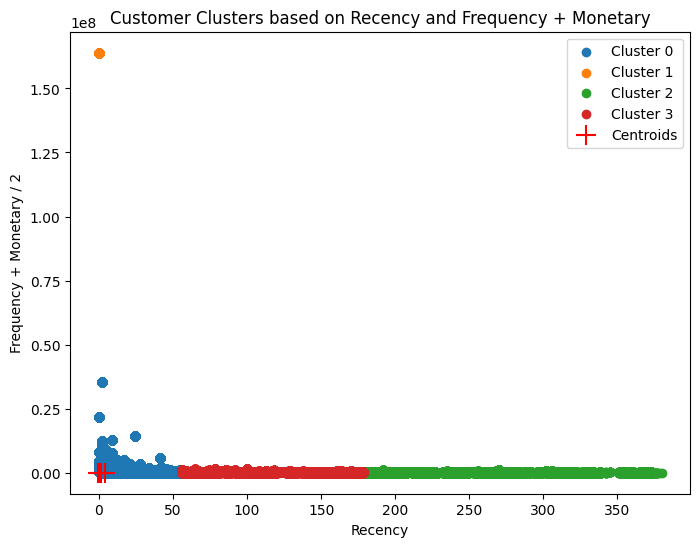

In [ ]:

# Visualize the clusters with legends and centroids
plt.figure(figsize=(8, 6))

for cluster_num in range(optimal_clusters):
  cluster_data = data[data['Cluster'] == cluster_num]
  plt.scatter(cluster_data['Recency'], cluster_data['FM/2'], label=f'Cluster {cluster_num}')


centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='+', s=200, color='red', label='Centroids')

plt.title('Customer Clusters based on Recency and Frequency + Monetary')
plt.xlabel('Recency')
plt.ylabel('Frequency + Monetary / 2')
plt.legend()
plt.show()

4 clusters can be described as follow:
cluster 0-
cluster 1-
cluster 2-
cluster 3-

          R_Score   F_Score   M_Score
Cluster                              
0        3.237964  3.022777  3.018369
1        5.000000  5.000000  5.000000
2        1.000000  1.304463  1.341173
3        1.000000  1.780243  1.819902


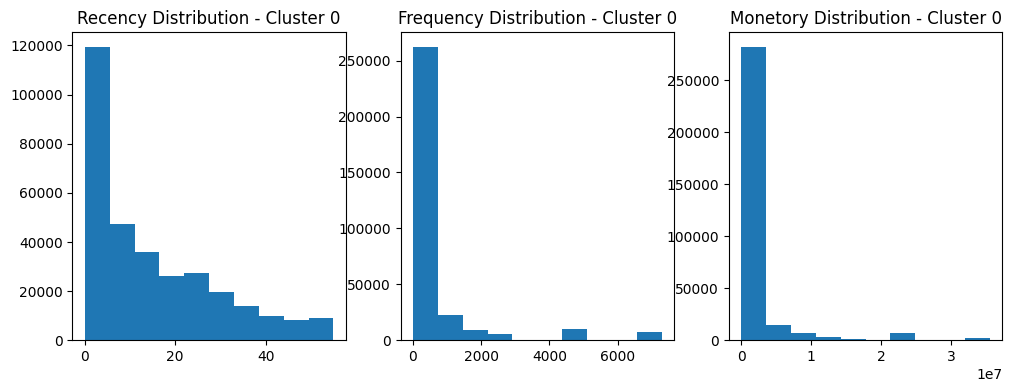

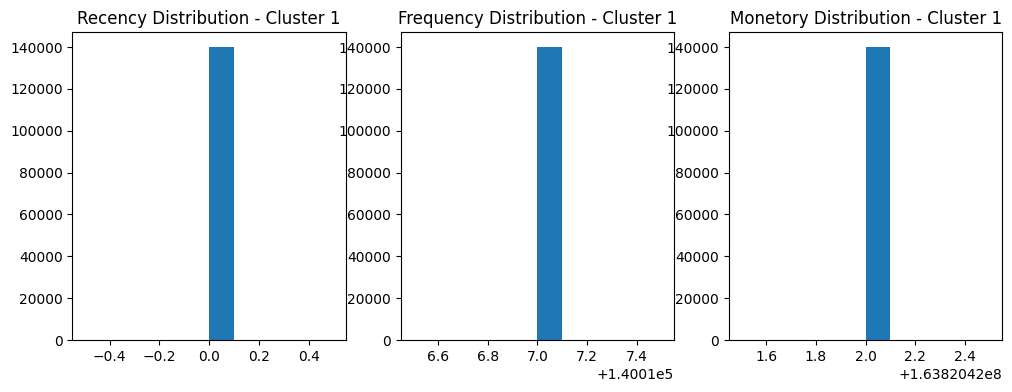

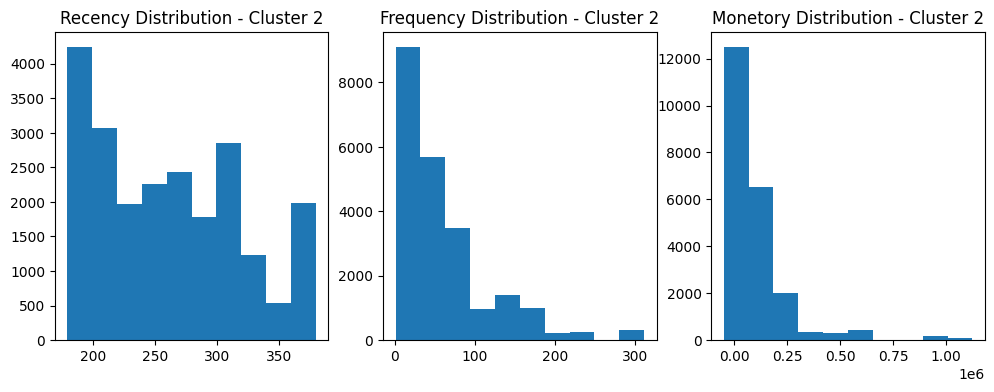

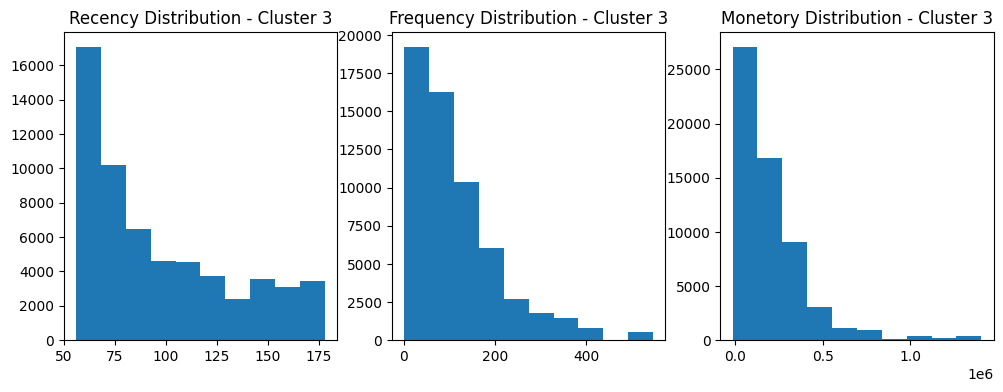

In [ ]:

# Analyse the clusters

cluster_analysis = data.groupby('Cluster').agg({'R_Score': 'mean', 'F_Score': 'mean', 'M_Score': 'mean'})
print(cluster_analysis)

# The distribution of different features within each cluster.


for cluster_num in range(optimal_clusters):
    cluster_data = data[data['Cluster'] == cluster_num]
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.hist(cluster_data['Recency'], bins=10)
    plt.title(f'Recency Distribution - Cluster {cluster_num}')

    plt.subplot(1, 3, 2)
    plt.hist(cluster_data['Frequency'], bins=10)
    plt.title(f'Frequency Distribution - Cluster {cluster_num}')

    plt.subplot(1, 3, 3)
    plt.hist(cluster_data['Monetory'], bins=10)
    plt.title(f'Monetory Distribution - Cluster {cluster_num}')

    plt.show()

In [ ]:

# Identify top products/categories purchased by each cluster
for cluster_num in range(optimal_clusters):
  cluster_data = data[data['Cluster'] == cluster_num]
  top_products_cluster = cluster_data.groupby('Item Code')['Quantity'].sum().sort_values(ascending=False).head(5)
  print(f"Top 5 Products for Cluster {cluster_num}:")
  print(top_products_cluster)
  print("\n")

Top 5 Products for Cluster 0:
Item Code
85099B    35019.0
76500     33671.0
14620     31419.0
77302     25251.0
85123A    21831.0
Name: Quantity, dtype: float64


Top 5 Products for Cluster 1:
Item Code
13147    5050.0
15766    4465.0
14620    4223.0
13142    4138.0
15507    3132.0
Name: Quantity, dtype: float64


Top 5 Products for Cluster 2:
Item Code
7459      2444.0
76500     1825.0
85123A    1758.0
14915     1621.0
13635     1365.0
Name: Quantity, dtype: float64


Top 5 Products for Cluster 3:
Item Code
13635     7628.0
85099B    5984.0
76500     5527.0
14400     4877.0
7459      4632.0
Name: Quantity, dtype: float64




In [ ]:
# Assign names based on cluster characteristics
def assign_cluster_names(row):
    if row['R_Score'] >=4 and row['F_Score'] >= 4 and row['M_Score'] >= 4:
        return 'Loyal Customers'
    elif row['R_Score'] >=3 and row['F_Score'] >= 3 and row['M_Score']>=3:
        return 'Recent and Potential Customers'
    elif row['R_Score'] ==3 and row['F_Score'] ==2:
        return 'At-Risk Customers'
    else:
        return 'Occasional Shoppers '

In [ ]:
# Create a new column for cluster names
data['ClusterName'] = data['Cluster'].apply(lambda x: assign_cluster_names(cluster_analysis.loc[x]))
data.sample(10)

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,...,Recency,R_Score,F_Score,M_Score,RFM_Score,RFM_Score%,FM/2,Cluster,ClusterName,Churn
8733,3215.0,15150,384724.0,2017-07-12,6.0,1:19:00 PM,443.0,2658.0,0.020155,NaN,...,8,3,2,4,9,60.000000,879064.0,0,Recent and Potential Customers,False
357178,636.0,77401,362288.0,2016-12-15,6.0,4:24:00 PM,197.0,1182.0,0.933052,NaN,...,16,3,3,3,9,60.000000,357635.0,0,Recent and Potential Customers,False
379674,348.0,13922,395563.0,2017-10-21,25.0,9:19:00 AM,90.0,2250.0,0.933052,NaN,...,59,1,1,1,3,20.000000,103157.0,3,Occasional Shoppers,True
237730,1934.0,13415,400400.0,2017-11-16,2.0,1:58:00 PM,50.0,100.0,0.933052,NaN,...,30,2,1,1,4,26.666667,20042.0,0,Recent and Potential Customers,True
62127,4043.0,14354,400134.0,2017-11-14,2.0,12:58:00 PM,305.0,610.0,0.933052,NaN,...,0,5,5,5,15,100.000000,163960439.0,1,Loyal Customers,False
152472,3012.0,15892,396285.0,2017-10-20,4.0,1:35:00 PM,511.0,2044.0,0.933052,NaN,...,26,2,1,2,5,33.333333,136759.0,0,Recent and Potential Customers,True
528657,4043.0,15195,377557.0,2017-05-11,10.0,4:21:00 PM,307.0,3070.0,0.933052,NaN,...,0,5,5,5,15,100.000000,163960439.0,1,Loyal Customers,False
137357,3220.0,15171,378449.0,2017-05-19,1.0,3:53:00 PM,220.0,220.0,0.933052,NaN,...,19,3,4,3,10,66.666667,345386.0,0,Recent and Potential Customers,False
252868,1795.0,77637,379162.0,2017-05-24,4.0,1:01:00 PM,174.0,696.0,0.933052,NaN,...,2,4,4,4,12,80.000000,1446188.0,0,Recent and Potential Customers,False
94803,3695.0,14014,401905.0,2017-11-23,3.0,3:26:00 PM,163.0,489.0,0.933052,NaN,...,23,2,2,2,6,40.000000,193223.0,0,Recent and Potential Customers,False


In [ ]:
from sklearn.metrics import silhouette_samples,silhouette_score

Model Evaluation

In [ ]:
# prompt: create new data frame with rfm_scaled dataframe  and clustor column

new_df = pd.concat([pd.DataFrame(rfm_scaled), pd.DataFrame(data['Cluster'])], axis=1)
new_df.columns = ['Recency_Scaled','FM_Scaled','Cluster']
print(new_df)

        Recency_Scaled  FM_Scaled  Cluster
0             0.219110  -0.611898        0
1             0.151247  -0.608552        0
2             0.151247  -0.608552        0
3             0.151247  -0.608552        0
4             0.151247  -0.608552        0
...                ...        ...      ...
537965       -0.442558  -0.598628        0
537966       -0.442558  -0.598628        0
537967       -0.442558  -0.598628        0
537968       -0.442558  -0.598628        0
537969       -0.442558  -0.598628        0

[537970 rows x 3 columns]


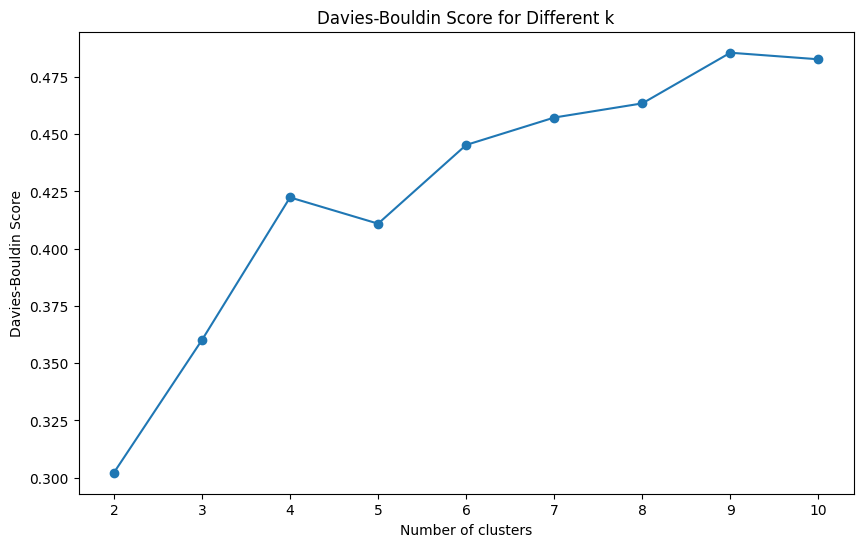

In [ ]:
# Plot Davies-Bouldin Score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), db_scores, marker='o')
plt.title('Davies-Bouldin Score for Different k')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Score')
plt.show()

In [ ]:
# silhouette_score(new_df,kmeans.labels_)

Doing PCA (Principal Component Analysis)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
kmeans_PCA=PCA(n_components=2).fit(rfm_scaled)

In [ ]:
kmeans_PCA.components_

array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

In [ ]:
kmeans_PCA.explained_variance_ratio_

array([0.65530332, 0.34469668])

In [ ]:
# transform the data

kmeans_PCAtransform=pd.DataFrame(kmeans_PCA.transform(rfm_scaled))

In [ ]:
kmeans_PCAtransform.columns=["PCA1",'PCA2']
kmeans_PCAtransform.head()

,PCA1,PCA2
0,-0.587612,-0.277743
1,-0.537259,-0.323364
2,-0.537259,-0.323364
3,-0.537259,-0.323364
4,-0.537259,-0.323364


In [ ]:
# combine cluster information

kmeans_PCAdata=pd.concat([kmeans_PCAtransform,data['Cluster']],axis=1)
kmeans_PCAdata.head()

,PCA1,PCA2,Cluster
0,-0.587612,-0.277743,0
1,-0.537259,-0.323364,0
2,-0.537259,-0.323364,0
3,-0.537259,-0.323364,0
4,-0.537259,-0.323364,0


<Axes: xlabel='PCA1', ylabel='PCA2'>

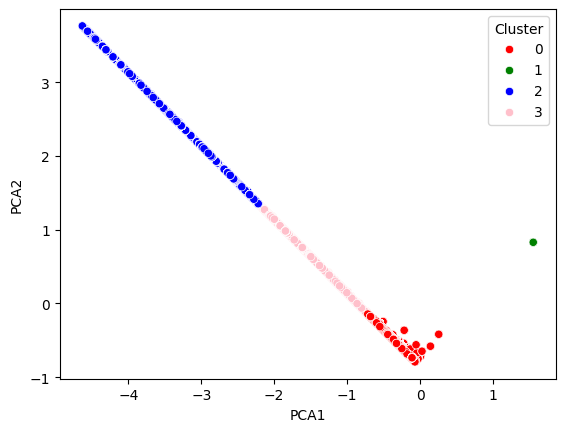

In [ ]:
#plot the PCA data
custom_palette = ["red", "green", "blue", "pink"]
sns.scatterplot(data=kmeans_PCAdata,x="PCA1",y="PCA2",hue="Cluster",palette=custom_palette)

Determining Churn Customers

In [ ]:
rfm['Churn'] = (data['R_Score']<2) | (data['F_Score']<2) | (data['M_Score']<2).astype(int)
data['Churn'] = rfm['Churn']
X = rfm[['Recency', 'FM/2']]
y = rfm['Churn']

<ipython-input-226-42cdbc2ac6a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['Churn'] = (data['R_Score']<2) | (data['F_Score']<2) | (data['M_Score']<2).astype(int)


In [ ]:
rfm.sample(10)

,Recency,FM/2,Churn
174145,38,78172.0,True
473419,0,163960439.0,False
303948,36,19112.0,True
61197,0,163960439.0,False
430538,0,163960439.0,False
236755,115,207232.0,True
387936,7,1100816.0,False
509103,0,163960439.0,False
415164,0,163960439.0,False
310017,2,613139.0,False


In [ ]:
rfm["Churn"].value_counts()

,count
Churn,
False,387640
True,150330


In [ ]:
data['ClusterName'].value_counts()

,count
ClusterName,
Recent and Potential Customers,316460
Loyal Customers,140017
Occasional Shoppers,81493


In [ ]:
data.sample(10)

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,...,Recency,R_Score,F_Score,M_Score,RFM_Score,RFM_Score%,FM/2,Cluster,ClusterName,Churn
405972,72.0,13639,406540.0,2017-12-15,24.0,8:48:00 AM,512.0,12288.0,0.933052,NaN,...,0,5,4,4,13,86.666667,1870963.0,0,Recent and Potential Customers,False
449483,4043.0,76803,376071.0,2017-04-28,1.0,9:49:00 AM,379.0,379.0,0.933052,NaN,...,0,5,5,5,15,100.000000,163960439.0,1,Loyal Customers,False
294786,1402.0,28393,397308.0,2017-10-29,24.0,3:54:00 PM,243.0,5832.0,0.933052,NaN,...,47,2,1,2,5,33.333333,167482.0,0,Recent and Potential Customers,True
392613,239.0,15628,390929.0,2017-09-16,10.0,3:07:00 PM,109.0,1090.0,0.933052,NaN,...,67,1,4,4,9,60.000000,743989.0,3,Occasional Shoppers,True
454850,4043.0,14567,391641.0,2017-09-14,1.0,1:29:00 PM,423.0,423.0,0.933052,NaN,...,0,5,5,5,15,100.000000,163960439.0,1,Loyal Customers,False
535211,4043.0,14601,390298.0,2017-09-11,30.0,9:38:00 AM,304.0,9120.0,0.933052,NaN,...,0,5,5,5,15,100.000000,163960439.0,1,Loyal Customers,False
501447,4043.0,90014B,385836.0,2017-07-21,1.0,4:12:00 PM,1087.0,1087.0,0.933052,NaN,...,0,5,5,5,15,100.000000,163960439.0,1,Loyal Customers,False
166325,2821.0,15622,391881.0,2017-09-23,30.0,10:53:00 AM,283.0,8490.0,0.933052,NaN,...,64,1,1,2,4,26.666667,169244.0,3,Occasional Shoppers,True
190270,2506.0,13337,374042.0,2017-04-14,6.0,12:08:00 PM,376.0,2256.0,0.933052,NaN,...,16,3,3,4,10,66.666667,677613.0,0,Recent and Potential Customers,False
95553,3692.0,14145,369951.0,2017-03-01,8.0,11:54:00 AM,122.0,976.0,0.933052,NaN,...,0,5,4,4,13,86.666667,581194.0,0,Recent and Potential Customers,False


<Axes: xlabel='Churn', ylabel='Recency'>

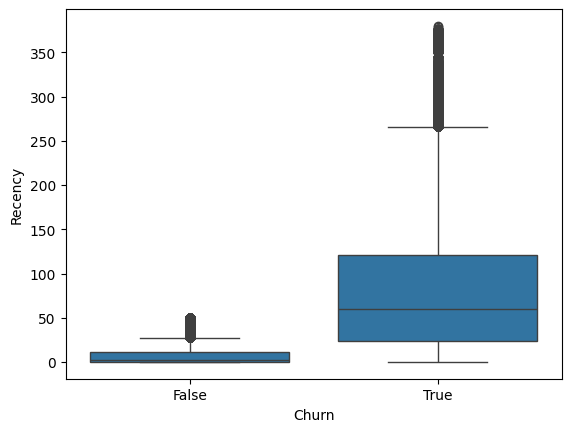

In [ ]:
sns.boxplot(y=rfm["Recency"],x=rfm["Churn"])

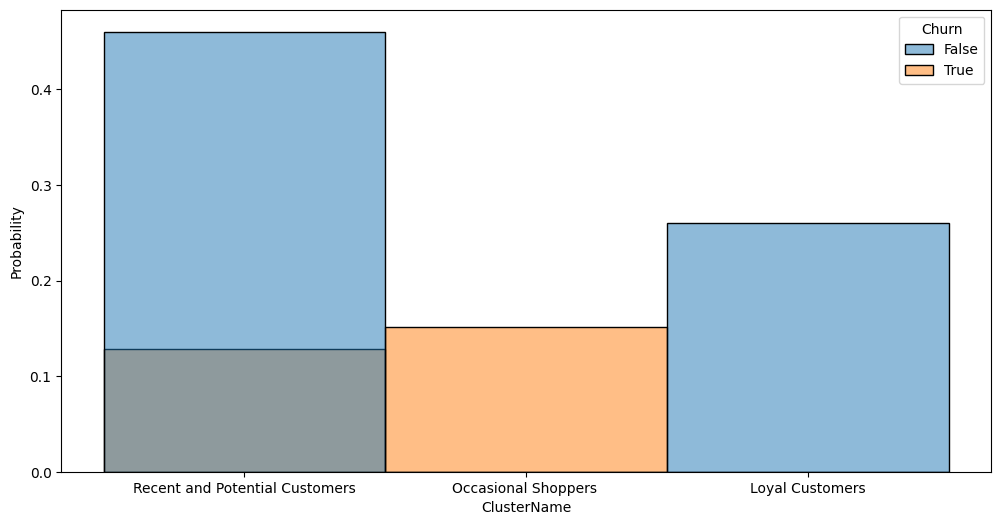

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(x=data["ClusterName"],hue=data["Churn"],stat="probability",fill=True)
plt.show()

Logistic Model for Churn Prediction

In [ ]:
#Prepare data for Logistic Regression
X = rfm[['Recency', 'FM/2']]
y = rfm['Churn']

In [ ]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Train Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Make predictions and evaluate the model
y_pred = logistic_model.predict(X_test)

Model Evaluation

In [ ]:
# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[111444   4856]
 [  6249  38842]]

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.96      0.95    116300
        True       0.89      0.86      0.87     45091

    accuracy                           0.93    161391
   macro avg       0.92      0.91      0.91    161391
weighted avg       0.93      0.93      0.93    161391



Random Forest Model

In [ ]:
#Random Forest Model

from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier().fit(X_train, y_train)

In [ ]:
#perdicction
test_Predict=rf.predict(X_test)

Random Forest Evaluation

In [ ]:
#Evaluation
print(confusion_matrix(y_test, test_Predict))

[[116300      0]
 [     0  45091]]


In [ ]:
print(classification_report(y_test, test_Predict))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    116300
        True       1.00      1.00      1.00     45091

    accuracy                           1.00    161391
   macro avg       1.00      1.00      1.00    161391
weighted avg       1.00      1.00      1.00    161391

